In [2]:
import numpy as np
import scipy.stats as ss
import elfi
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import pyabc
from pyabc.plots import plot_marginals, plot_particles
%matplotlib notebook

 /anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning: This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.



In [3]:
z = pyabc.Prior("multivariate_normal", [0,0], [[1, 0.9], [0.9, 1]], name="z")

In [4]:
def simulator(mu1, mu2):
    u1 = np.random.normal(mu1, 1, 30)
    u2 = np.random.normal(mu2, 1, 30)
    a = 1.15
    b=0.5
    x = u1 * a
    y = (u2 / a) + b * (u1**2 + a**2)
    return x+y

In [5]:
y0 = simulator(-1, 1)
y0

array([ 0.96388472,  1.33441106,  0.57568768,  1.71706166,  1.12366695,
        2.16156156,  0.60468846,  2.20241372,  0.20388129,  1.68343735,
        3.8597176 ,  0.40998026,  0.08692209,  1.24722338,  2.11534928,
        0.67834723,  1.61222374,  0.82422403, -0.38116555, -0.87111105,
        0.31074424,  0.94992412,  1.27028568,  1.27126422,  1.0255917 ,
        2.22835518,  0.89819016,  0.58685153,  3.12599011,  2.17902439])

In [6]:
def total(X):
    return np.sum(X)

def mean(X):
    return np.mean(X)

def cov(X):
    return np.cov(X)

In [10]:
rej = pyabc.RejectionSampler(
    priors=[z],
    simulator=simulator,
    summaries=[cov, mean, total],
    observation=y0
)

mcmc = pyabc.MCMCSampler(
    priors=[z],
    simulator=simulator,
    summaries=[cov, mean, total],
    observation=y0
)

smc = pyabc.SMCSampler(
    priors=[z],
    simulator=simulator,
    summaries=[cov,mean,total],
    observation=y0
)

abcde = pyabc.ABCDESampler(
    priors=[z], 
    simulator=simulator, 
    summaries=[cov, mean, total],
    observation=y0, 
    exp_lambda = 1)

In [11]:
mcmc.sample(nr_samples=10000, threshold=5, step_size=[0.1, 0.1])

MCMC sampler started with threshold: 5 and number of samples: 10000
Samples:  10000 - Threshold: 5.0000 - Iterations:      50387 - Acceptance rate: 0.198464 - Time:    20.12 s


In [12]:
smc.sample(nr_samples=10000, thresholds=[10, 5])

SMC sampler started with thresholds: [10, 5] and number of samples: 10000
Iteration 0 completed
starting iteration[ 1 ]
Iteration 1 completed
Samples:  10000 - Thresholds: 5.00 - Iterations:     133258 - Acceptance rate: 0.075042 - Time:    51.60 s


In [19]:
abcde.sample(nr_samples=1000, nr_groups = 10, nr_iter = 200, burn_in = 100, alpha = 0.1, beta = 0.1, kappa = 0.9)

ABC-Differential-Evolution sampler started with number of samples: 1000
initializing pools
starting iteration [ 100 ]
Samples:   1000 - Iterations:        200 - Acceptance rate: None - Time:   459.02 s


<IPython.core.display.Javascript object>


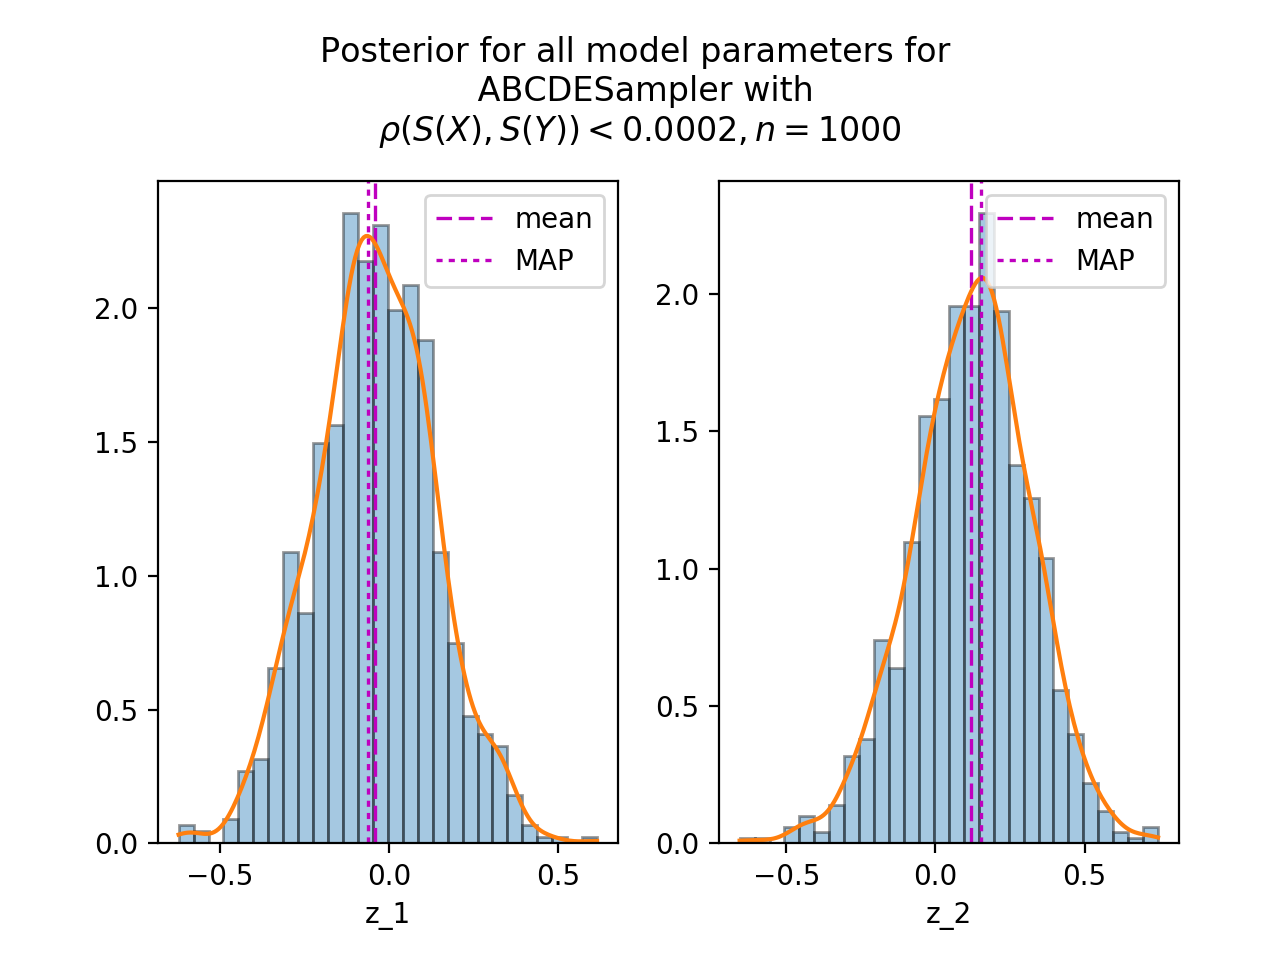

<IPython.core.display.Javascript object>


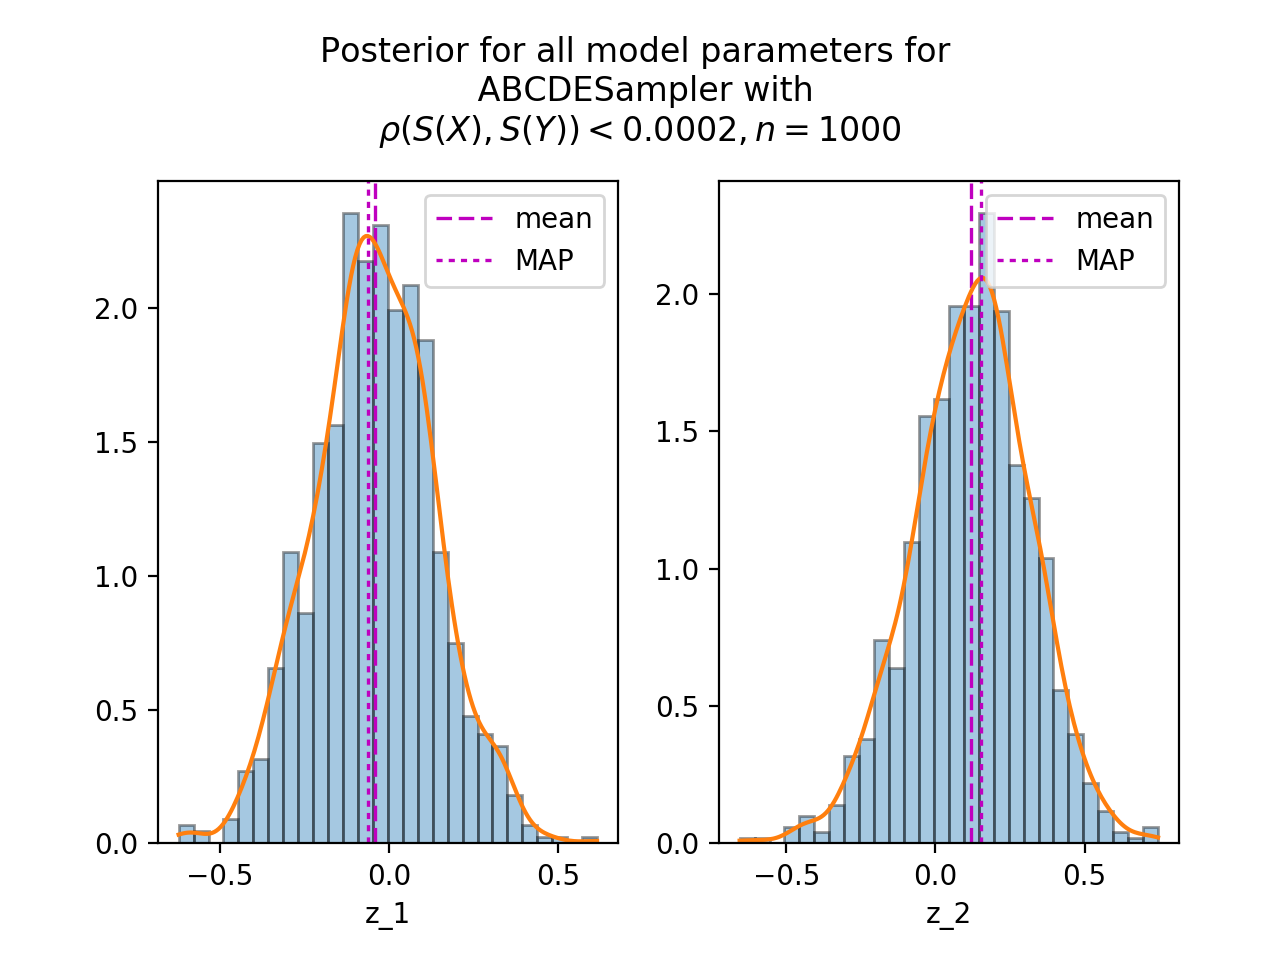

In [17]:
plot_marginals(abcde, normed=True)

In [18]:
abcde.distances]|

array([[[  20.60329494,   55.6933875 ,   30.28902175, ...,   34.6648548 ,
           44.19691089,   47.33463259],
        [  45.57601022,   21.38363029,   59.4696126 , ...,   31.35564746,
           45.29246194,   55.33305636],
        [  62.50665905,    4.34361436,    4.4823563 , ...,    9.26155922,
           22.28431275,   23.21698703],
        ..., 
        [ 129.28993163,   41.29519325,    8.96604276, ...,    8.19431958,
           15.34788913,   31.70582586],
        [ 231.54565486,   53.83350978,   73.41994561, ...,   34.09237661,
           43.38425804,   32.2449919 ],
        [  18.15981257,  113.22235422,  354.0447822 , ...,   91.19423266,
            7.54194488,   25.47550138]],

       [[  51.42849554,   15.96786072,   25.39335543, ...,   34.6648548 ,
           24.1139887 ,   10.72555672],
        [  16.89958884,   21.38363029,   59.4696126 , ...,   16.36944006,
           42.46799637,   60.33246864],
        [  33.89768399,    4.34361436,    4.4823563 , ...,   34.80475394